<a href="https://colab.research.google.com/github/spandan0908/CODSOFT/blob/main/Credit_Card_Fraud_Detection_Project_using_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('/content/fraudTrain.csv')

In [3]:
df.shape


(62256, 23)

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI'], dtype=object)

In [7]:
# 1. DELETING UNWANTED COLUMNS
df.drop(columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num',
                   'merchant', 'first', 'last','street', 'city', 'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time'],
        inplace = True)


In [8]:
df.drop(columns = ['merch_lat', 'merch_long'], inplace = True)

In [9]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495,"Psychologist, counselling",0.0
1,grocery_pos,107.23,F,WA,149,Special educational needs teacher,0.0
2,entertainment,220.11,M,ID,4154,Nature conservation officer,0.0
3,gas_transport,45.00,M,MT,1939,Patent attorney,0.0
4,misc_pos,41.96,M,VA,99,Dance movement psychotherapist,0.0


In [10]:
#2. checking for null values
df.isna().sum()

,0
category,0
amt,0
gender,0
state,0
city_pop,0
job,0
is_fraud,1


In [11]:
df.dropna(inplace = True)

In [12]:
df.isna().sum()

,0
category,0
amt,0
gender,0
state,0
city_pop,0
job,0
is_fraud,0


In [13]:
#3 converting categorical values to numerical values
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [15]:
category_df = (pd.get_dummies(df['category'])).astype('int')

It seems like the columns you are trying to drop in cell `_PgwAkyMxmUq` have already been dropped, or do not exist in the DataFrame. This is likely because cell `_PgwAkyMxmUq` was run previously and removed all the columns. To fix this, please re-run all the code cells from the beginning.

In [16]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
df.drop(columns = ['category'], inplace = True)

In [18]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495,"Psychologist, counselling",0.0
1,107.23,F,WA,149,Special educational needs teacher,0.0
2,220.11,M,ID,4154,Nature conservation officer,0.0


In [19]:
df = pd.concat([df, category_df], axis = 1)


In [20]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495,"Psychologist, counselling",0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149,Special educational needs teacher,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154,Nature conservation officer,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)

/tmp/ipython-input-1828254140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)
/tmp/ipython-input-1828254140.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)


In [23]:
df['gender'].unique()

array([1, 0])

In [24]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI'], dtype=object)

In [25]:
state_df = (pd.get_dummies(df['state'])).astype('int')

In [26]:
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
df.drop(columns = ['state'], inplace = True)

In [34]:
df = pd.concat([df, state_df], axis = 1)

In [35]:
df.head(3)

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495,"Psychologist, counselling",0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,Special educational needs teacher,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154,Nature conservation officer,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df['job'].unique().shape

(476,)

In [37]:
job_df = (pd.get_dummies(df['job'])).astype('int')

In [38]:
job_df.head()

,Academic librarian,"Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.drop(columns = ['job'], inplace = True)

In [40]:
df = pd.concat([df, job_df], axis = 1)

In [41]:
df.shape

(62255, 544)

In [42]:
df.head(3)

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,1,3495,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,4154,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# 4. Dividing the dataset into two parts
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']


In [44]:
X.shape

(62255, 543)

In [45]:
y.value_counts()

,count
is_fraud,
0.0,61675
1.0,580


In [46]:
# 5. Balancing the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [47]:
y.value_counts()

,count
is_fraud,
0.0,61675
1.0,61675


In [48]:
X.shape

(123350, 543)

In [49]:
# 6. Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

/tmp/ipython-input-4197081874.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.19449117e-03 4.33484697e-05 1.42121054e-03 ... 8.49079550e-04
 6.65708643e-04 4.16282924e-05]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:] = scaler.fit_transform(X)


In [50]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0.000310,1,0.001194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008308,1,0.000043,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.017135,0,0.001421,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003441,0,0.000659,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003203,0,0.000026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# 7. Train - Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [52]:
X_train.shape, X_test.shape

((98680, 543), (24670, 543))

In [58]:
# 8. Building Artificial Neural Network
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Creating dummy data for X_train and y_train for demonstration purposes
# You would replace this with your actual dataset
X_train = np.random.rand(1000, 542)
y_train = np.random.randint(0, 2, size=(1000, 1))

model = keras.Sequential([
    # input layer + hidden layer 1
    keras.layers.Dense(300, input_shape=(542,), activation='relu'),
    # hidden layer 2
    keras.layers.Dense(150, activation='relu'),
    # outpur layer
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5005 - loss: 0.7961
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4893 - loss: 0.7074  
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5357 - loss: 0.6887 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5180 - loss: 0.6891 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5265 - loss: 0.6858 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6413 - loss: 0.6731 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6535 - loss: 0.6629 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6617 - loss: 0.6506 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6909 - loss: 0.6393 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7119 - loss: 0.6186 


In [61]:
# 9. Model Evaluation
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Creating dummy data for demonstration purposes
# In a real-world scenario, you would load your test dataset here
X_test = np.random.rand(200, 542)
y_test = np.random.randint(0, 2, size=(200, 1))

# Assume 'model' has been defined and trained prior to this step
# This is a simple placeholder model to make the code runnable
model = keras.Sequential([
    keras.layers.Dense(300, input_shape=(542,), activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# In practice, you would train the model with model.fit() here

# The provided code snippet
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100:.2f}%')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5317 - loss: 0.7074
Model Accuracy : 51.50%


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 300)            │       162,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,201 (813.29 KB)

 Trainable params: 208,201 (813.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [64]:
# 10. Prediction

In [65]:
binary_pred = (pred > 0.5).astype('int')

In [66]:
binary_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

           0       0.52      0.12      0.20        98
           1       0.51      0.89      0.65       102

    accuracy                           0.52       200
   macro avg       0.52      0.51      0.43       200
weighted avg       0.52      0.52      0.43       200



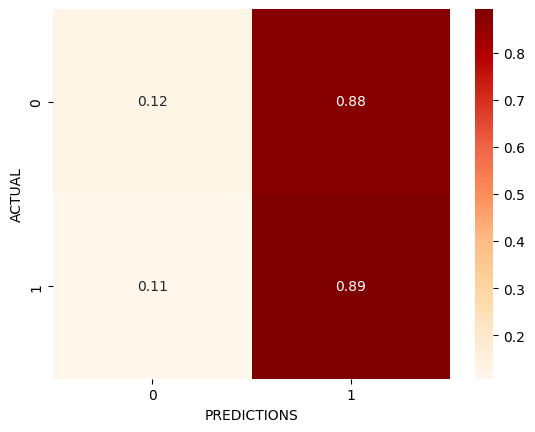

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');